In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\kisha\Desktop\myproject\notebooks\data\stores sales prediction.csv")

In [3]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
data.shape

(8523, 12)

In [6]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data["Item_Weight"].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [10]:
mean_value= data.loc[:, 'Item_Weight'].mean()

In [11]:
data['Item_Weight'].fillna(value=mean_value, inplace=True) 

In [12]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [13]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df=pd.DataFrame(data["Outlet_Size"])

In [15]:
df

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


In [16]:
data["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [17]:
data['Outlet_Size'].fillna(value="medium", inplace=True) 

In [18]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
data = pd.DataFrame(data)
import re
# Function to extract numeric part from a string
def extract_numeric(value):
    numeric_part = re.findall(r'\d+', value)  # Find all numeric parts
    return int(numeric_part[0]) if numeric_part else None  # Convert to int if found

# Apply the function to extract numeric part and convert to int
data['Item_Identifier'] = data['Item_Identifier'].apply(extract_numeric)

# Display the DataFrame
print(data)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0                  15        9.300          Low Fat         0.016047   
1                   1        5.920          Regular         0.019278   
2                  15       17.500          Low Fat         0.016760   
3                   7       19.200          Regular         0.000000   
4                  19        8.930          Low Fat         0.000000   
...               ...          ...              ...              ...   
8518               22        6.865          Low Fat         0.056783   
8519               36        8.380          Regular         0.046982   
8520               29       10.600          Low Fat         0.035186   
8521               46        7.210          Regular         0.145221   
8522                1       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               S

In [21]:
data=data.drop("Outlet_Identifier",axis=1)
#data['Outlet_Identifier'] = data['Outlet_Identifier'].apply(extract_numeric)

In [22]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,15,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,15,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,7,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,medium,Tier 3,Grocery Store,732.3800
4,19,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,22,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,36,8.380,Regular,0.046982,Baking Goods,108.1570,2002,medium,Tier 2,Supermarket Type1,549.2850
8520,29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,46,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
data=data.drop("Outlet_Establishment_Year",axis=1)

In [24]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,15,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,15,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,7,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,medium,Tier 3,Grocery Store,732.3800
4,19,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,22,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,36,8.380,Regular,0.046982,Baking Goods,108.1570,medium,Tier 2,Supermarket Type1,549.2850
8520,29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,46,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [25]:
X=data.drop('Item_Outlet_Sales',axis=1)

In [26]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,15,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,15,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,7,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,medium,Tier 3,Grocery Store
4,19,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,22,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1
8519,36,8.380,Regular,0.046982,Baking Goods,108.1570,medium,Tier 2,Supermarket Type1
8520,29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1
8521,46,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2


In [27]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,15,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,15,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,7,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,medium,Tier 3,Grocery Store,732.3800
4,19,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,22,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,36,8.380,Regular,0.046982,Baking Goods,108.1570,medium,Tier 2,Supermarket Type1,549.2850
8520,29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,46,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [28]:
data.dtypes

Item_Identifier           int64
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [29]:
y=data['Item_Outlet_Sales']

In [30]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [31]:
categorical_cols=X.select_dtypes(include='object').columns

In [32]:
numerical_cols=X.select_dtypes(exclude='object').columns

In [33]:
numerical_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [34]:
X.select_dtypes(include='object')

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


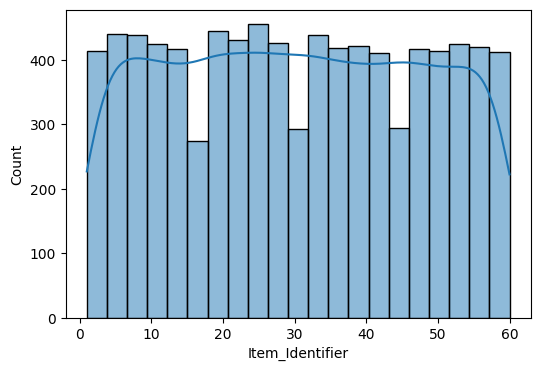

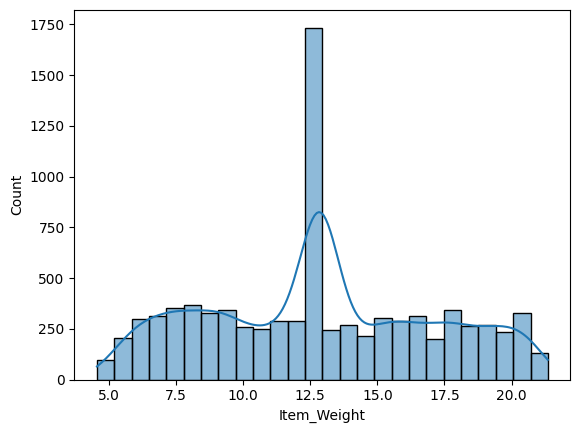

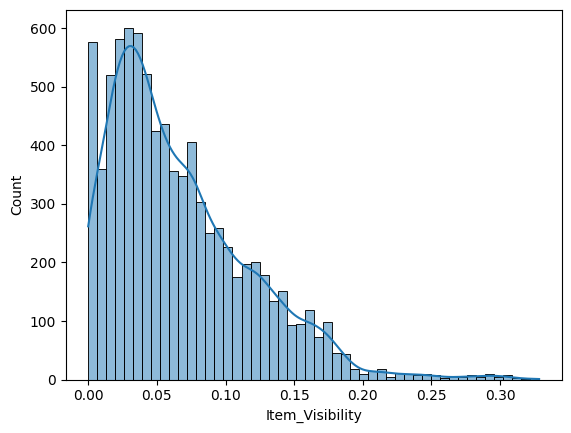

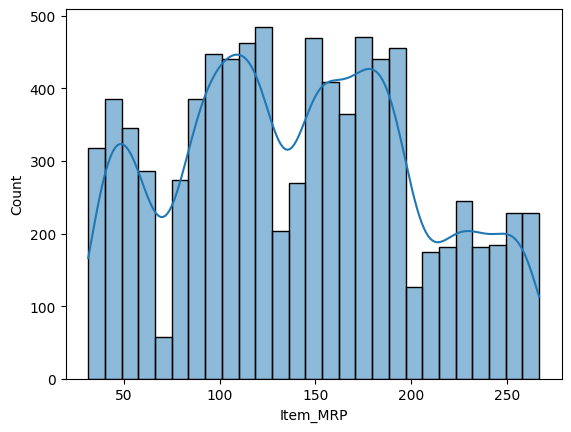

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_cols:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

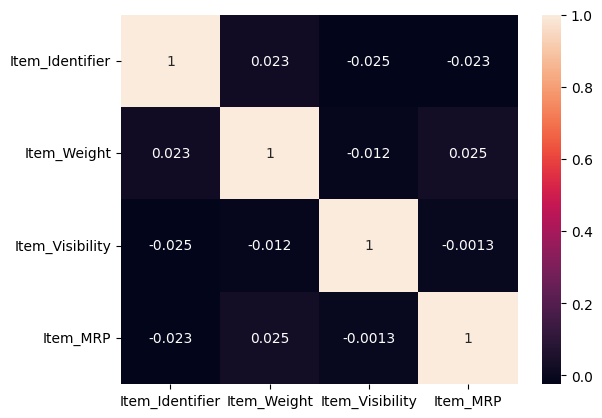

In [36]:
sns.heatmap(data[numerical_cols].corr(),annot=True)

In [37]:
Item_Fat_Content_map=["Low Fat","Regular","LF","reg","low fat"]
Item_Type_map=["Fruits and Vegetables","Snack Foods","Household","Frozen Foods","Dairy","Canned","Baking Goods","Health and Hygiene",
           "Soft Drinks","Meat","Breads","Hard Drinks","Others","Starchy Foods","Breakfast","Seafood"]
Outlet_Size_map=["Medium","medium","Small","High"]
Outlet_Location_Type_map=["Tier 3","Tier 2","Tier 1"]
Outlet_Type_map=["Supermarket Type1","Grocery Store","Supermarket Type3","Supermarket Type2"]

In [38]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [40]:
cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[Item_Fat_Content_map,Item_Type_map,Outlet_Size_map,Outlet_Location_Type_map,Outlet_Type_map]))
    ]
    
)

In [41]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [42]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)


In [43]:
preprocessor.fit_transform(X_train)

array([[ 1.54760233e+00, -1.76218461e-03, -5.16518314e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00],
       [ 2.70153249e-01, -1.28788114e+00,  2.70092104e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.52988864e+00, -1.17047923e+00, -1.17286144e+00, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.37340473e+00, -1.69598333e-01, -1.28046983e+00, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.12087382e-01, -1.76218461e-03, -9.08137404e-01, ...,
         2.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [-2.52439558e-01, -1.20486969e+00,  1.42186736e+00, ...,
         2.00000000e+00,  2.00000000e+00,  0.00000000e+00]])

In [44]:
preprocessor.transform(X_test)

array([[-8.91164101e-01, -1.76218461e-03,  1.63078913e+00, ...,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00],
       [ 1.72179994e+00, -1.76218461e-03, -6.18152270e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00],
       [ 9.08877792e-01, -1.30448342e+00,  1.82200510e+00, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       ...,
       [-7.75032366e-01,  1.21787874e+00, -9.05140747e-01, ...,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 8.50811924e-01, -9.98526943e-01,  4.27032893e-01, ...,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.29762517e+00, -8.65868842e-02,  8.47678641e-01, ...,
         3.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [45]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Item_Identifier', 'num_pipeline__Item_Weight',
       'num_pipeline__Item_Visibility', 'num_pipeline__Item_MRP',
       'cat_pipeline__Item_Fat_Content', 'cat_pipeline__Item_Type',
       'cat_pipeline__Outlet_Size', 'cat_pipeline__Outlet_Location_Type',
       'cat_pipeline__Outlet_Type'], dtype=object)

In [46]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [47]:
X_train

,num_pipeline__Item_Identifier,num_pipeline__Item_Weight,num_pipeline__Item_Visibility,num_pipeline__Item_MRP,cat_pipeline__Item_Fat_Content,cat_pipeline__Item_Type,cat_pipeline__Outlet_Size,cat_pipeline__Outlet_Location_Type,cat_pipeline__Outlet_Type
0,1.547602,-0.001762,-0.516518,-1.637167,2.0,1.0,0.0,0.0,2.0
1,0.270153,-1.287881,2.700921,1.083355,0.0,13.0,1.0,0.0,1.0
2,-1.529889,-1.170479,-1.172861,-0.301400,0.0,3.0,0.0,2.0,0.0
3,0.676614,1.751524,-1.003937,0.117483,0.0,2.0,0.0,0.0,3.0
4,-0.716966,-0.001762,-0.885663,-1.558515,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
5961,-0.484703,0.150589,-1.280470,-1.008886,1.0,1.0,2.0,1.0,0.0
5962,1.025010,-1.285509,-0.550617,-1.090730,0.0,6.0,0.0,2.0,0.0
5963,1.373405,-0.169598,-1.280470,-0.371370,0.0,2.0,1.0,1.0,0.0
5964,0.212087,-0.001762,-0.908137,0.375316,1.0,1.0,2.0,2.0,1.0


In [48]:
X_test

,num_pipeline__Item_Identifier,num_pipeline__Item_Weight,num_pipeline__Item_Visibility,num_pipeline__Item_MRP,cat_pipeline__Item_Fat_Content,cat_pipeline__Item_Type,cat_pipeline__Outlet_Size,cat_pipeline__Outlet_Location_Type,cat_pipeline__Outlet_Type
0,-0.891164,-0.001762,1.630789,-0.932362,1.0,9.0,0.0,0.0,2.0
1,1.721800,-0.001762,-0.618152,-1.576348,0.0,6.0,0.0,0.0,2.0
2,0.908878,-1.304483,1.822005,-0.764417,0.0,1.0,0.0,2.0,0.0
3,-1.065362,-0.406774,0.767042,-0.587280,1.0,6.0,0.0,0.0,3.0
4,-1.587955,1.988699,-1.086459,0.709715,0.0,9.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2552,-1.355691,1.217879,3.344333,-0.849496,1.0,0.0,1.0,0.0,1.0
2553,1.663734,0.506352,-0.035896,-1.540809,0.0,11.0,1.0,1.0,0.0
2554,-0.775032,1.217879,-0.905141,-0.184017,0.0,7.0,2.0,1.0,0.0
2555,0.850812,-0.998527,0.427033,-0.292760,1.0,1.0,2.0,1.0,0.0


In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
model4=RandomForestRegressor()

In [51]:
model4.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
model4.score(X_train,y_train)

0.9360225173723138

In [53]:
y_pred4=model4.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
mean_absolute_error(y_test,y_pred4)

806.919241915526